<a href="https://colab.research.google.com/github/szostaklab/AI_PPP_Ribozyme/blob/main/pppLandscape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
#Imports
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import networkx as nx
!pip install Levenshtein
from Levenshtein import distance as levenshtein_distance
from sklearn.cluster import KMeans
import collections

In [27]:
#Define functions and constants

rs1 = 'GAATGCTGCCAACCGTGCGGGCTAATTGGCAGACTGAGCT'
quality_cutoff = 0.9 

def seqmatch(seq1, seq2):
  overall = 0
  overlap = 0
  for pos in range(len(seq1)):
    overall+=1
    if seq1[pos] == seq2[pos]:
      overlap+=1
  return overlap/overall


In [121]:
'pGCGC\n'.strip('\n')

'pGCGC'

In [71]:
#Upload raw seqs
raw_seqs = []
for round in range(1,7):
    raw_seqs.append(open('/Users/zoeweiss/Desktop/Desktop/lab(s)/szostak/spring 2022/ppp landscape/seqs/ppp-'+str(round)+'_S'+str(round)+'_L001_R2_001.fastq').readlines())

#Filter by quality
all_high_quality = []
unique_high_quality = []
for round in raw_seqs:
    high_quality = []
    seqs = round[1::4]
    qualities = round[3::4]
    acceptable_quals_1_percent_error = [5,6,7,8,9,':',';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K']
    for seq in range(len(qualities)):
        overlap=0
        for char in list(set(qualities[seq]).intersection(acceptable_quals_1_percent_error)):
            overlap+=qualities[seq].count(char)
        if overlap/len(qualities[1])>quality_cutoff:
            high_quality.append(seqs[seq].strip("\n"))
    print('High quality seqs r'+str(1+raw_seqs.index(round))+': '+str(len(high_quality)))
    all_high_quality.append(high_quality)
    unique_high_quality.append(list(set(high_quality)))
    print('Unique high quality seqs r'+str(1+raw_seqs.index(round))+': '+str(len(list(set(high_quality)))))
    

High quality seqs r1: 1793335
Unique high quality seqs r1: 1658322
High quality seqs r2: 1824368
Unique high quality seqs r2: 1617437
High quality seqs r3: 1238531
Unique high quality seqs r3: 301725
High quality seqs r4: 1959238
Unique high quality seqs r4: 136149
High quality seqs r5: 1553726
Unique high quality seqs r5: 115878
High quality seqs r6: 1515844
Unique high quality seqs r6: 126708


In [81]:
#Trim seqs to randomized region
all_trimmed_seqs = []
all_unique_trimmed_seqs = []
round = 1
for round in range(len(all_high_quality)):
    trimmed_seqs = []
    for seq in all_high_quality[round]:
        if 'ACTCACTGACACAGATCCACTCACGGACAGCG' in seq and 'CGCTGTCC' in seq:
            if len(seq[len('ACTCACTGACACAGATCCACTCACGGACAGCG')+seq.index('ACTCACTGACACAGATCCACTCACGGACAGCG'):seq.index('CGCTGTCC')]) == 40:
                trimmed_seqs.append(seq[len('ACTCACTGACACAGATCCACTCACGGACAGCG')+seq.index('ACTCACTGACACAGATCCACTCACGGACAGCG'):seq.index('CGCTGTCC')])
    all_trimmed_seqs.append(trimmed_seqs)
    all_unique_trimmed_seqs.append(list(set(trimmed_seqs)))


In [86]:
#Cluster top sequences
k = 30
matrix = np.asarray([np.fromstring(str(s), dtype=np.uint8) for s in all_unique_trimmed_seqs[-1]]);
kmeans = KMeans(init="random", n_clusters=k,n_init=10,max_iter=300,random_state=42)
kmeans.fit(matrix)
labels = kmeans.labels_[:]

all_clusters = []
for cluster_num in range(0, k):
  seqs_in_cluster = []
  for seq in range(len(labels)):
    if labels[seq] == cluster_num:
      seqs_in_cluster.append(all_unique_trimmed_seqs[-1][seq])
  all_clusters.append(seqs_in_cluster)

order_of_clusters = []
for rank in labels:
    if rank not in order_of_clusters:
        order_of_clusters.append(rank)
all_clusters_ordered = []
for cluster_num in order_of_clusters:
    all_clusters_ordered.append(all_clusters[cluster_num])


<ipython-input-86-383a6d1c60d0>:3: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  matrix = np.asarray([np.fromstring(str(s), dtype=np.uint8) for s in all_unique_trimmed_seqs[-1]]);


In [90]:
#Find peak seqs
peak_seqs = []
peak_clusters = []
top_seqs = collections.Counter(all_trimmed_seqs[-1]).most_common(10000)

i = 0
while len(peak_clusters)<11:
    top_seq = top_seqs[i]
    for cluster in all_clusters_ordered:
        if top_seq[0] in cluster:
            if all_clusters_ordered.index(cluster) not in peak_clusters:
                peak_clusters.append(all_clusters_ordered.index(cluster))
                peak_seqs.append(top_seq[0])
                print(top_seq)
    i+=1

('GACAGCCGAGAAATGAGTGGCCTAAATGGGAGAATGAGCT', 143854)
('GACTGCGCGTATGAGTGGCGGCTAAAGAGGAGAATGAGCG', 125090)
('ACGGGTGGGTAATCTAGTGTCCGCGGAATAGAACGAAACA', 94478)
('GACAGCGGAGAACTGAGTGGCCTAATTGGGAGAATGAGCT', 29821)
('GACAGCCGAGAATTGAGTGGCCTAAATGGGAGAATGAGCT', 3324)
('GGATGGTGCGAACTGAGTGGGCTAATTAGGAGAATGAGCG', 1370)
('GGAGGGTGACATCGTTGAGAGAGAATGGGGATATTGAACT', 713)
('CAATGCTATCCTCGGGGAACGATTCTGCGGAATCCGACAT', 306)
('GAATCTGGCGAACGATTAGTCCTAATTGAGAATTATAGTT', 262)
('ACAAGCGACGAATGGTGCGGGTTAATTGGTGGGGTGATCT', 252)
('GACGGCGAAGATGGGAACGGGCTAATTAGGAGAATGTACT', 160)


In [100]:
#Plot dynamics
#Count each peak in each round
all_peak_counts = []
for peak in peak_seqs:
    counts = []
    for round in range(len(all_trimmed_seqs)):
        counts.append(all_trimmed_seqs[round].count(peak))
    all_peak_counts.append(counts)

#Count RS1 in each round
all_rs1_counts = []
for round in range(len(all_trimmed_seqs)):
    all_rs1_counts.append(all_trimmed_seqs[round].count(rs1))

#Find total counts
all_total_counts = []
for round in range(len(all_trimmed_seqs)):
  all_total_counts.append(len(all_trimmed_seqs[round]))

[1396849, 1400802, 311846, 588621, 531411, 607447]

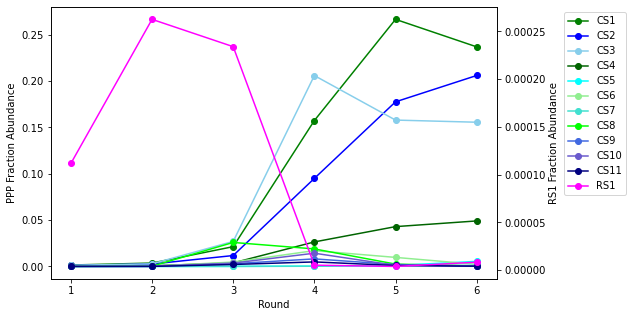

In [111]:
#Plot the dynamics
palate = ['green', 'blue', 'skyblue', 'darkgreen', 'cyan', 'lightgreen', 'turquoise', 'lime', 'royalblue', 'slateblue', 'navy']

fig, ax1 = plt.subplots(figsize = (8,5))

lns = []
ax2 = ax1.twinx()

counter = 0
for seq in all_peak_counts:
    lns+= ax1.plot(range(1,7), np.array(seq)/np.array(all_total_counts), marker = 'o', color = palate[counter], label = 'CS'+str(1+all_peak_counts.index(seq)))
    counter+=1
lns+= ax2.plot(range(1,7), np.array(all_rs1_counts)/np.array(all_total_counts), marker = 'o', color = 'magenta', label = 'RS1')

ax1.set_xlabel('Round')
ax1.set_ylabel('PPP Fraction Abundance')
ax2.set_ylabel('RS1 Fraction Abundance')

# added these three lines
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0, bbox_to_anchor = (1.3,1))

plt.show()

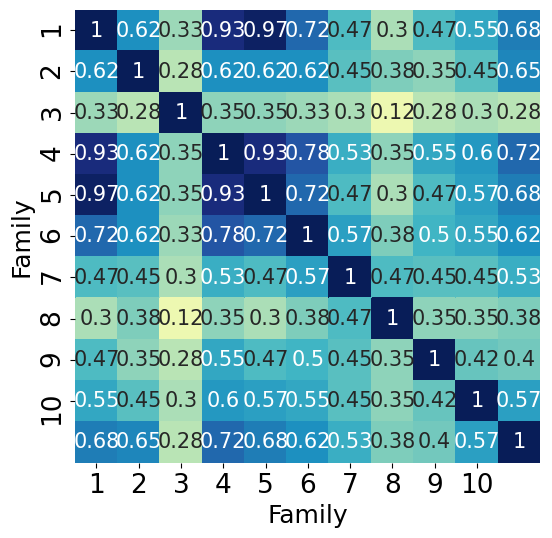

In [112]:
all_overlap = []
for seq1 in peak_seqs:
  overlap = []
  for seq2 in peak_seqs:
    overlap.append(seqmatch(seq1, seq2))
  all_overlap.append(overlap)

yticklabels = list(range(1, 11))
xticklabels = list(range(1, 11))

fig = plt.figure(num=1, figsize=(6, 6), dpi=100, facecolor='w', edgecolor='k')


ax = sns.heatmap(all_overlap, cbar=False, annot=True, annot_kws={"fontsize":15}, cmap="YlGnBu", yticklabels=yticklabels ,xticklabels=xticklabels,  vmin=0, vmax=1)
ax.set_ylabel('Family', fontsize=18)
ax.set_xlabel('Family', fontsize=18)
    
ax.tick_params(axis='both', which='major', labelsize=19)
ax.tick_params(axis='both', which='minor', labelsize=19)



In [116]:
connected_counts = []
for seq in all_trimmed_seqs[-1]:
  if seqmatch(seq.strip(), rs1)>.95:
    connected_counts.append(seq)
  else:
    for peak in peak_seqs:
      if seqmatch(seq.strip(), peak.strip())>.95:
        connected_counts.append(seq)
connected_counts = list(set(connected_counts))
print(len(connected_counts))

840


In [115]:
#Connection Matrix
connections = [ [ 0 for i in range(len(connected_counts)) ] for j in range(len(connected_counts)) ]
print(len(connected_counts))
for seq2 in range(len(connected_counts)):
  if seq2%100 == 0:
    print(seq2)
  for seq1 in range(len(connected_counts)):
    if int(seqmatch(connected_counts[seq1], connected_counts[seq2])*len(connected_counts[seq1])) == (len(connected_counts[seq1])-1):
      connections[seq1][seq2] = 1
connections_orig = connections


10974
0
100
200


KeyboardInterrupt: 

In [ ]:
#Remove points with 0 connections
deleted = []
counter = -1
print(len(connections))
for row in connections:
  counter+=1
  if counter%100==0:
    print(counter)
  if sum(row) < 10:
    deleted.append(counter)
    np.delete(connections, counter, axis = 0)
    np.delete(connections, counter, axis = 1)

In [ ]:
label_locs = []
for peak in peak_seqs:
  peak_index = connected_counts.index(peak+'\n')
  label_locs.append(connections.index(connections_orig[peak_index]))

In [ ]:
G = nx.from_numpy_matrix(np.array(connections))  
plt.figure(figsize=(12,12)) 
labeldict = {}
for element in label_locs:
  labeldict[element] = 'CS'+str(1+label_locs.index(element))
nx.draw(G, node_size = 3, labels=labeldict, with_labels = True) 


In [ ]:
#https://www.geeksforgeeks.org/building-an-undirected-graph-and-finding-shortest-path-using-dictionaries-in-python/
# Python implementation to find the
# shortest path in the graph using
# dictionaries

# Function to find the shortest
# path between two nodes of a graph
def BFS_SP(graph, start, goal):
	explored = []
	
	# Queue for traversing the
	# graph in the BFS
	queue = [[start]]
	
	# If the desired node is
	# reached
	if start == goal:
		print("Same Node")
		return
	
	# Loop to traverse the graph
	# with the help of the queue
	while queue:
		path = queue.pop(0)
		node = path[-1]
		
		# Condition to check if the
		# current node is not visited
		if node not in explored:
			neighbours = graph[node]
			
			# Loop to iterate over the
			# neighbours of the node
			for neighbour in neighbours:
				new_path = list(path)
				new_path.append(neighbour)
				queue.append(new_path)
				
				# Condition to check if the
				# neighbour node is the goal
				if neighbour == goal:
					return new_path
			explored.append(node)

	# Condition when the nodes
	# are not connected
	return 0

In [ ]:
# Graph using dictionaries
start = 0
indices = [i for i, x in enumerate(connections[start]) if x == 1]
connections_dict = {start:indices}
start = 1
for start in range(1, len(connections)):
  indices = [i for i, x in enumerate(connections[start]) if x == 1]
  connections_dict[start]=indices

In [ ]:
#FIND ALL COMPLETE PATHS BTWN CS1-CS10
for peak_seq2 in peak_seqs:
  for peak_seq1 in peak_seqs:
    if peak_seq1!=peak_seq2:
      connnect = BFS_SP(connections_dict,connected_counts.index(peak_seq1+'\n'),connected_counts.index(peak_seq2+'\n'))
      if connnect!=0:
        print('CS'+str(1+peak_seqs.index(peak_seq1)), 'CS'+str(1+peak_seqs.index(peak_seq2)))
        print(connnect)

In [ ]:
#FIND CLOSEST PATH FROM RS1 TO CS1
for cs in range(1,11):
  cs1_mutants = []
  for seq in connected_counts:
    if seqmatch(seq.strip(), peak_seqs[cs-1])>.65:
      cs1_mutants.append(seq)

  for cs1_mutant in cs1_mutants:
    connect = BFS_SP(connections_dict,connected_counts.index(rs1+'\n'),connected_counts.index(cs1_mutant.strip()+'\n'))
    if connect!=0:
      print('RS1 CS'+str(cs)+' '+str(seqmatch(peak_seqs[cs-1]+'\n', cs1_mutant.strip()+'\n')))

In [ ]:
seqmatch('GACAGCGGAGAACTGAGTGGCCTAATTGGGAGAATGAGCT', rs1.strip())